In [124]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

In [125]:
from keras.models import load_model
model = load_model('testVG16v2.h5')

In [126]:
classes = { 
    0:'None',
    1:'go',
    2:'warning',
    3:'stop', 
}

In [127]:
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic Light Classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

In [161]:
def sigToSign(pred):
    if pred == np.array([0.0,0.0,1.0]):
        return 'stop'
    elif pred == np.array([0.0,1.0,0.0]):
        return 'warning'
    elif pred == np.array([1.0,0.0,1.0]):
        return 'go'
    elif pred == np.array([0.0,0.0,0.0]):
        return 'none'

In [169]:
def classify(file_path):
    sig = ''
    global label_packed
    image = Image.open(file_path)
    image = image.resize((112,112))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict([image])[0]
    print(pred)
    pred = numpy.argmax(pred, axis=0)
    print(pred)
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

In [170]:
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image", command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
                            (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
    
    upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
    upload.configure(background='#364156', foreground='white',
    font=('arial',10,'bold'))

    upload.pack(side=BOTTOM,pady=50)
    sign_image.pack(side=BOTTOM,expand=True)
    label.pack(side=BOTTOM,expand=True)
    heading = Label(top, text="Image Classification CIFAR10",pady=20, font=('arial',20,'bold'))

    heading.configure(background='#CDCDCD',foreground='#364156')
    heading.pack()
    top.mainloop()

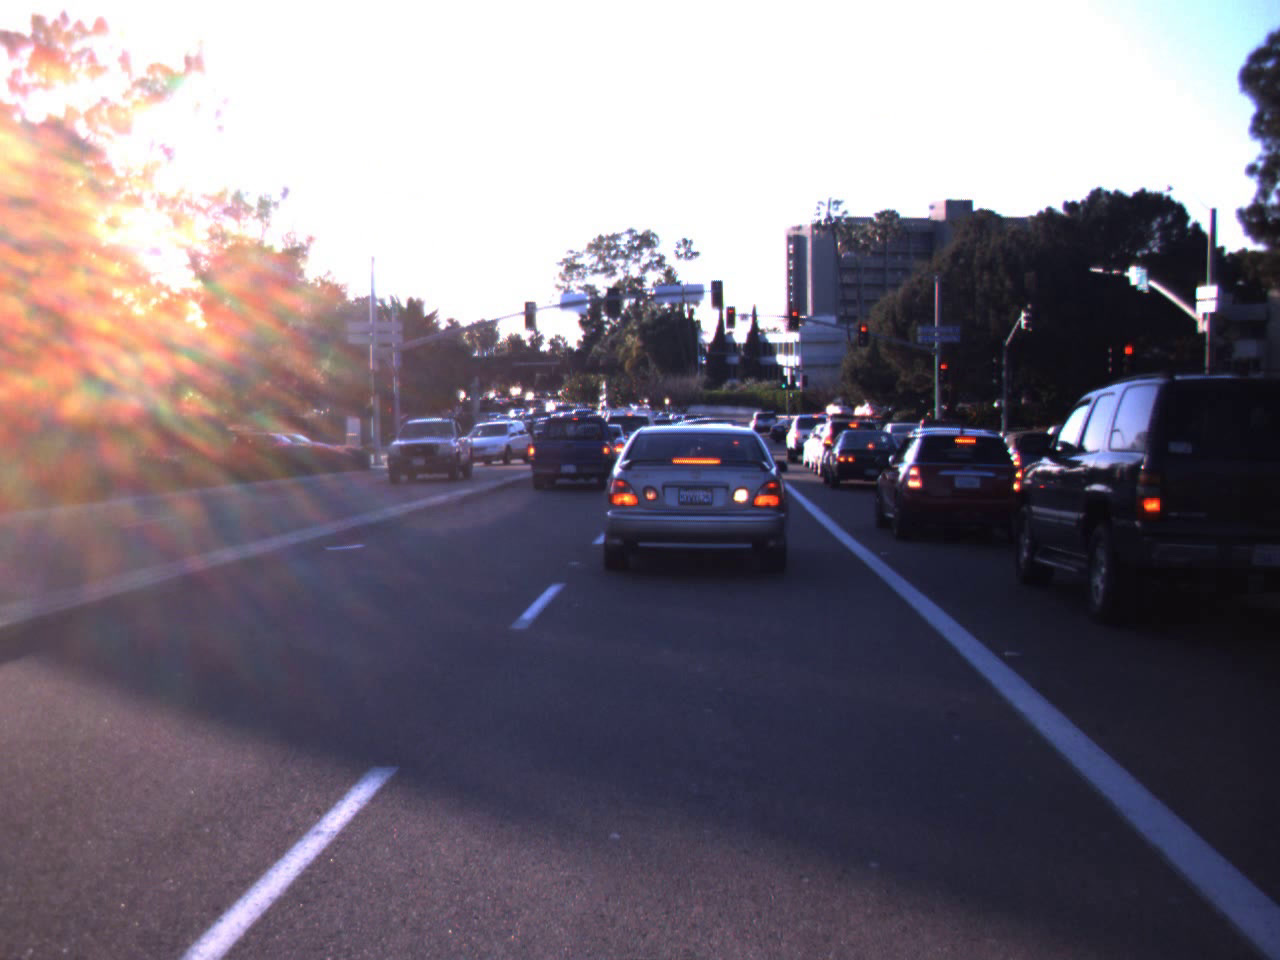

[0. 0. 1.]
2
warning
None


In [181]:
from IPython.display import display
fPath = 'C:/Users/Austin/HCL_TrafficLight/LISATrafficSet/dayTrain/dayTrain/dayClip1/frames/dayClip1--00140.jpg'
display(Image.open(fPath))
print(classify(fPath))

In [ ]:
# fPath = 'C:/Users/Austin/HCL_TrafficLight/LISATrafficSet/dayTrain/dayTrain/dayClip1/frames/dayClip1--00401.jpg'
# display(Image.open(fPath))

In [175]:
arr = np.array([0.0,0.0,1.0])
print(arr)
print( arr.dtype)
def sigToSign(pred):
    if pred == np.array([0.0,0.0,1.0]):
        return 'stop'
    if pred == np.array([0.0,1.0,0.0]):
        return 'warning'
    if pred == np.array([1.0,0.0,1.0]):
        return 'go'
    elif pred == np.array([0.0,0.0,0.0]):
        return 'none'

  

    

[0. 0. 1.]
float64


In [ ]:
# from keras.models import load_model
# from keras.preprocessing import image
# import numpy as np

# # dimensions of our images
# img_width, img_height = 112, 112

# # load the model we saved
# model = load_model('testVG16.h5')
# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# # predicting images
# img = image.load_img('C:/Users/Austin/HCL_TrafficLight/LISATrafficSet/dayTrain/dayTrain/dayClip1/frames/dayClip1--00401.jpg', target_size=(img_width, img_height))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)

# images = np.vstack([x])
# classes = model.predict(images, batch_size=10)[0]
# print (classes)

# # predicting multiple images at once
# img = image.load_img('C:/Users/Austin/HCL_TrafficLight/LISATrafficSet/dayTrain/dayTrain/dayClip1/frames/dayClip1--00500.jpg', target_size=(img_width, img_height))
# y = image.img_to_array(img)
# y = np.expand_dims(y, axis=0)

# # pass the list of multiple images np.vstack()
# images = np.vstack([x, y])
# classes = model.predict(images, batch_size=10)[0]

# # print the classes, the images belong to
# print (classes)
